<a href="https://colab.research.google.com/github/gcasado0/ciencia_datos/blob/master/U3_Ej5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio N° 5

Utilizando el dataset calidad_producto.csv, que contiene dos variables registradas en el área de control de calidad de una industria:
- **desviacion_largo**: desviación del largo del producto respecto a un valor estándar o deseado.
- **indice_calidad_producto**: índice o puntuación que se construye a partir de una serie de
aspectos relacionados a la calidad general del producto.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Mounted at /content/drive


In [3]:
archivo= '/content/drive/MyDrive/TUIA/Fundamentos CD/datasets/unidad3/calidad_producto.csv'
calidad_producto = pd.read_csv(archivo, sep=';')
calidad_producto

,desviacion_largo,indice_calidad_producto
0,-1.090,-0.74400
1,0.997,0.72000
2,-0.579,-0.54800
3,1.270,0.93500
4,1.490,0.94200
...,...,...
195,-0.359,-0.52800
196,-0.978,-0.68000
197,-0.030,0.20200
198,-3.230,0.00784


In [4]:
calidad_producto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   desviacion_largo         200 non-null    float64
 1   indice_calidad_producto  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [5]:
calidad_producto.describe()

,desviacion_largo,indice_calidad_producto
count,200.000000,200.000000
mean,0.025489,0.105108
std,1.112120,1.446126
min,-3.230000,-1.320000
25%,-0.708000,-0.635500
50%,0.011575,-0.010680
75%,0.739750,0.604000
max,5.000000,15.000000


1. Calcule los coeficientes de correlación de Pearson y Spearman entre ambas variables. Interprete los valores obtenidos en relación al tipo de información que le brinda cada uno acerca del grado
de asociación entre las variables.

In [6]:
calidad_producto[['desviacion_largo','indice_calidad_producto']].corr(method='pearson')

,desviacion_largo,indice_calidad_producto
desviacion_largo,1.000000,0.561225
indice_calidad_producto,0.561225,1.000000


La correlacion de pearson es: 0.56, con lo cual la relacion lineal entre ambas variables es **moderada**.


In [7]:
calidad_producto[['desviacion_largo','indice_calidad_producto']].corr(method='spearman')

,desviacion_largo,indice_calidad_producto
desviacion_largo,1.000000,0.940055
indice_calidad_producto,0.940055,1.000000


La correlacion de spearman es: 0.94, con lo cual la relacion lineal entre ambas variables es **intensa**.

2. Construya un gráfico que le permita visualizar la relación general que existe entre las variables
analizadas. ¿Qué observa?

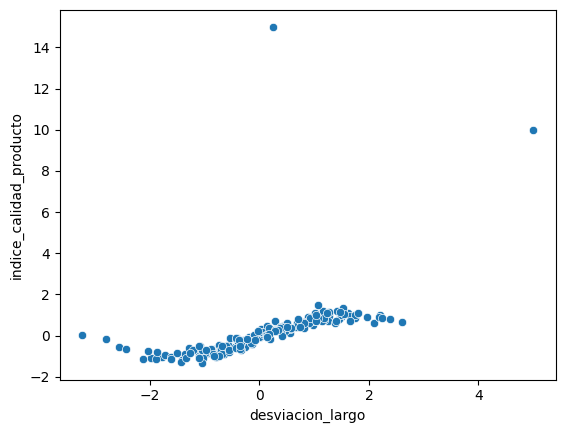

In [9]:
sns.scatterplot(x='desviacion_largo', y='indice_calidad_producto', data=calidad_producto);

El metodo de spearman para ser mas apropiado para medir la correlacion en este caso, ya que puede cuantificar o medir la fuerza de cualquier tipo de relación monótona, a diferencia del coeficiente de correlación de Pearson que sólo se emplea para relaciones lineales.
Y además, como está basado en rangos, es menos sensible a la presencia de outliers que el coeficiente de correlación de Pearson.


3. Calcule nuevamente ambos coeficientes sin tomar en cuenta los registros que incluyan
observaciones potencialmente atípicas. ¿Cómo resultan los valores obtenidos en comparación
con los calculados en el ítem 1?

In [19]:
# calcular los valores para separar las observaciones potencialmente atipicas.
desviacion_largo_extremo_inferior = calidad_producto['desviacion_largo'].quantile(q=0.25)*1.5
desviacion_largo_extremo_superior = calidad_producto['desviacion_largo'].quantile(q=0.75)*1.5

indice_calidad_extremo_inferior = calidad_producto['indice_calidad_producto'].quantile(q=0.25)*1.5
indice_calidad_extremo_superior = calidad_producto['indice_calidad_producto'].quantile(q=0.75)*1.5


sin_obs_atipicas=calidad_producto[(calidad_producto['desviacion_largo']>=desviacion_largo_extremo_inferior) & (calidad_producto['desviacion_largo']<=desviacion_largo_extremo_superior) & (calidad_producto['indice_calidad_producto']>=indice_calidad_extremo_inferior) & (calidad_producto['indice_calidad_producto']<=indice_calidad_extremo_superior)]


In [20]:
sin_obs_atipicas[['desviacion_largo','indice_calidad_producto']].corr(method='pearson')

,desviacion_largo,indice_calidad_producto
desviacion_largo,1.000000,0.937275
indice_calidad_producto,0.937275,1.000000


In [21]:
sin_obs_atipicas[['desviacion_largo','indice_calidad_producto']].corr(method='spearman')

,desviacion_largo,indice_calidad_producto
desviacion_largo,1.000000,0.939794
indice_calidad_producto,0.939794,1.000000


- Al quitar los valores atípicos de ambas varibles, el metodo de pearson paso de 0.56 a 0.93, igualando al valor arrojado por el metodo de spearman.
- Mientras que el método de spearman no mostró practicamente diferencias.

4. En función de las características de la relación entre ambas variables que se observan
gráficamente, ¿cuál de las dos métricas informaría para describir en forma cuantitativa el grado
de asociación entre ellas?

Elegiria el metodo de **spearman** ya que la relacion entre ellas no parece ser lineal sino mas bien **monótona**.